<a href="https://colab.research.google.com/github/lomasterI/Neural-Networks-Exam/blob/main/%22%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_18_4%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Дипломная работа

In [ ]:
pip install rembg==1.0.10

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 68 kB 3.8 MB/s 
     |████████████████████████████████| 14.5 MB 14.5 MB/s 
     |████████████████████████████████| 748.8 MB 19 kB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 58 kB 7.1 MB/s 
     |████████████████████████████████| 2.2 MB 52.3 MB/s 
     |████████████████████████████████| 5.9 MB 50.7 MB/s 
     |████████████████████████████████| 61 kB 485 kB/s 
     |████████████████████████████████| 12.5 MB 7.0 MB/s 
  Created wheel for rembg: filename=rembg-1.0.10-py3-none-any.whl size=10916 sha256=1ff3595688f9eeaf38349fc69c1ab23f4e1300d6626573242af8e37c2a20e6e5
  Stored in directory: /root/.cache/pip/wheels/94/46/2c/0809f1587a2584b0ff940bce961fc7b40993fab72466c82ca8
Successfully built rembg
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
 

In [ ]:
pip install pillow

In [ ]:
import pandas as pd 
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
from tensorflow.keras.models import Sequential #Сеть прямого распространения
from tensorflow import keras
#Базовые слои для свёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, Conv3D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image, ImageFile #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
import pickle
# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
batch_size =128
img_height = 142  
img_width = 142


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Парсинг

In [ ]:
#переименовываем файлы в папке
ext = "JPG"
ext_1 = 'png'
i = 1000000
dir = '/content/drive/MyDrive/02_2022_images/train/toy'
for file in os.listdir(dir):
    #if file.endswith(ext):
    os.rename(f'{dir}/{file}', f'{dir}/{i}.{ext_1}')
    i = i + 1

In [ ]:
#меняем расширение файлов в папке
import glob

for filename in glob.iglob(os.path.join('/content/drive/MyDrive/02_2022_images/test/toy', '*.JPG')):
    os.rename(filename, filename[:-4] + '.png')

In [ ]:
# проверка файлов на повреждения. код рабочий
from skimage import io

def verify_image(img_file):
    try:
        io.imread(img_file)
    except ValueError:
        print(f"Изображение"+ img_file + "повреждено")
        return False
    return True
path = "/content/drive/MyDrive/02_2022_images/train_1/toy/"
dir_ = os.listdir(path)

for image in dir_:
    file = os.path.join(path,image)
    verify_image(file)

In [ ]:
from rembg.bg import remove
import io
from PIL import Image

u2net.pth: 100%|██████████| 168M/168M [00:03<00:00, 45.0MiB/s]
u2netp.pth: 100%|██████████| 4.47M/4.47M [00:00<00:00, 18.8MiB/s]


In [ ]:
#меняем фон в папке bag


dir = '/content/drive/MyDrive/02_2022_images/train_1/bag'
dir_1 = '/content/drive/MyDrive/02_2022_images/train_2/bag'
for file in os.listdir(dir):
    
    input_path = (f'{dir}/{file}')
    f = np.fromfile(input_path)
    result = remove(f)
    img = Image.open(io.BytesIO(result)).convert("RGBA")
    img.save(f'{dir_1}/{file}')# Сохранить картинки после модификации точек пикселей
    

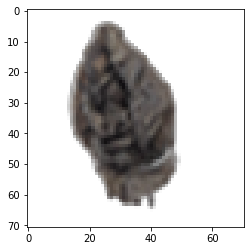

In [ ]:
img = Image.open("/content/drive/MyDrive/02_2022_images/train_2/bag/22874.png")
plt.imshow(img)

In [ ]:
#меняем фон в папке bal


dir = '/content/drive/MyDrive/02_2022_images/train_1/bal'
dir_1 = '/content/drive/MyDrive/02_2022_images/train_2/bal'
for file in os.listdir(dir):
    input_path = (f'{dir}/{file}')
    f = np.fromfile(input_path)
    result = remove(f)
    img = Image.open(io.BytesIO(result)).convert("RGBA")
    img.save(f'{dir_1}/{file}')# Сохранить картинки после модификации точек пикселей
    

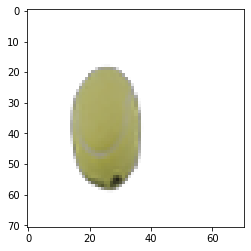

In [ ]:
img = Image.open("/content/drive/MyDrive/02_2022_images/train_2/bal/5358.png")
plt.imshow(img)

In [ ]:
#меняем фон в папке ban


dir = '/content/drive/MyDrive/02_2022_images/train_1/ban'
dir_1 = '/content/drive/MyDrive/02_2022_images/train_2/ban'
for file in os.listdir(dir):
    input_path = (f'{dir}/{file}')
    f = np.fromfile(input_path)
    result = remove(f)
    img = Image.open(io.BytesIO(result)).convert("RGBA")
    img.save(f'{dir_1}/{file}')# Сохранить картинки после модификации точек пикселей
    

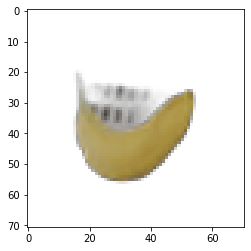

In [ ]:
img = Image.open("/content/drive/MyDrive/02_2022_images/train_2/ban/27183.png")
plt.imshow(img)

In [ ]:
#меняем фон в папке bea


dir = '/content/drive/MyDrive/02_2022_images/train_1/bea'
dir_1 = '/content/drive/MyDrive/02_2022_images/train_2/bea'
for file in os.listdir(dir):
    input_path = (f'{dir}/{file}')
    f = np.fromfile(input_path)
    result = remove(f)
    img = Image.open(io.BytesIO(result)).convert("RGBA")
    img.save(f'{dir_1}/{file}')# Сохранить картинки после модификации точек пикселей

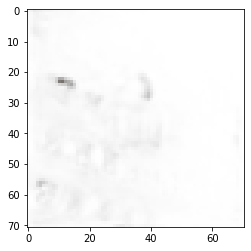

In [ ]:
img = Image.open("/content/drive/MyDrive/02_2022_images/train_2/bea/15290.png")
plt.imshow(img)

In [ ]:
#меняем фон в папке can

ImageFile.LOAD_TRUNCATED_IMAGES = True
dir = '/content/drive/MyDrive/02_2022_images/train_1/can'
dir_1 = '/content/drive/MyDrive/02_2022_images/train_2/can'
for file in os.listdir(dir):
    input_path = (f'{dir}/{file}')
    f = np.fromfile(input_path)
    result = remove(f)
    img = Image.open(io.BytesIO(result)).convert("RGBA")
    img.save(f'{dir_1}/{file}')# Сохранить картинки после модификации точек пикселей
    

OSError: ignored

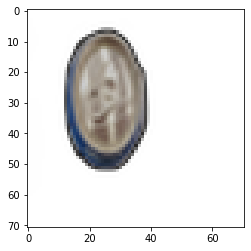

In [ ]:
img = Image.open("/content/drive/MyDrive/02_2022_images/train_2/can/34500.png")
plt.imshow(img)

In [ ]:
#меняем фон в папке gbt


dir = '/content/drive/MyDrive/02_2022_images/train_1/gbt'
dir_1 = '/content/drive/MyDrive/02_2022_images/train_2/gbt'
for file in os.listdir(dir):
    input_path = (f'{dir}/{file}')
    f = np.fromfile(input_path)
    result = remove(f)
    img = Image.open(io.BytesIO(result)).convert("RGBA")
    img.save(f'{dir_1}/{file}')# Сохранить картинки после модификации точек пикселей
    

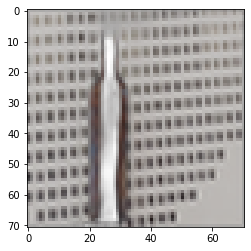

In [ ]:
img = Image.open("/content/drive/MyDrive/02_2022_images/train_2/gbt/28964.png")
plt.imshow(img)

In [ ]:
#меняем фон в папке mon


dir = '/content/drive/MyDrive/02_2022_images/train_1/mon'
dir_1 = '/content/drive/MyDrive/02_2022_images/train_2/mon'
for file in os.listdir(dir):
    input_path = (f'{dir}/{file}')
    f = np.fromfile(input_path)
    result = remove(f)
    img = Image.open(io.BytesIO(result)).convert("RGBA")
    img.save(f'{dir_1}/{file}')# Сохранить картинки после модификации точек пикселей
    

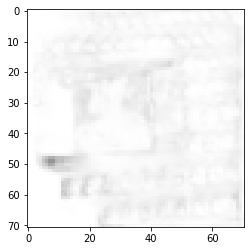

In [ ]:
img = Image.open("/content/drive/MyDrive/02_2022_images/train_2/mon/49210.png")
plt.imshow(img)

In [ ]:
#меняем фон в папке pbt


dir = '/content/drive/MyDrive/02_2022_images/train_1/pbt'
dir_1 = '/content/drive/MyDrive/02_2022_images/train_2/pbt'
for file in os.listdir(dir):
    input_path = (f'{dir}/{file}')
    f = np.fromfile(input_path)
    result = remove(f)
    img = Image.open(io.BytesIO(result)).convert("RGBA")
    img.save(f'{dir_1}/{file}')# Сохранить картинки после модификации точек пикселей
    

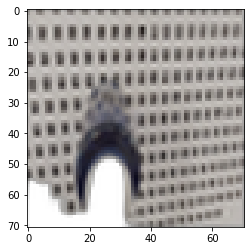

In [ ]:
img = Image.open("/content/drive/MyDrive/02_2022_images/train_1/pbt/17551.png")
plt.imshow(img)

In [ ]:
#меняем фон в папке toy


dir = '/content/drive/MyDrive/02_2022_images/train/toy'
dir_1 = '/content/drive/MyDrive/02_2022_images/train_1/toy'
for file in os.listdir(dir):
    input_path = (f'{dir}/{file}')
    f = np.fromfile(input_path)
    result = remove(f)
    img = Image.open(io.BytesIO(result)).convert("RGBA")
    img.save(f'{dir_1}/{file}')# Сохранить картинки после модификации точек пикселей

KeyboardInterrupt: ignored

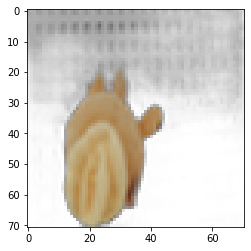

In [ ]:
img = Image.open("/content/drive/MyDrive/02_2022_images/train_1/toy/1020096.png")
plt.imshow(img)

###Выборка и нейронка

In [ ]:
## Загружаем тренировочную, валидационную и тестовую выборки

training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/02_2022_images/train_11',
    validation_split=0.1,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/02_2022_images/train_11',
    validation_split=0.1,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/content/drive/MyDrive/02_2022_images/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)
class_names = training_ds.class_names

VGG-16 пробуем

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(142,142,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(len(class_names), activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 142, 142, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 71, 71, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 128)      0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_10 = model.fit(training_ds,validation_data= validation_ds,epochs = 30)

Epoch 1/30
16/16 [==============================] - 133s 7s/step - loss: 407.5924 - accuracy: 0.2689 - val_loss: 1.5509 - val_accuracy: 0.4204
Epoch 2/30
16/16 [==============================] - 27s 2s/step - loss: 1.5441 - accuracy: 0.3891 - val_loss: 1.3502 - val_accuracy: 0.5310
Epoch 3/30
16/16 [==============================] - 27s 2s/step - loss: 1.5770 - accuracy: 0.3719 - val_loss: 1.5626 - val_accuracy: 0.2035
Epoch 4/30
16/16 [==============================] - 27s 2s/step - loss: 1.9704 - accuracy: 0.2983 - val_loss: 1.5204 - val_accuracy: 0.4204
Epoch 5/30
16/16 [==============================] - 26s 2s/step - loss: 1.5423 - accuracy: 0.3288 - val_loss: 1.4528 - val_accuracy: 0.4204
Epoch 6/30
16/16 [==============================] - 26s 2s/step - loss: 1.4764 - accuracy: 0.3616 - val_loss: 1.1840 - val_accuracy: 0.4248
Epoch 7/30
16/16 [==============================] - 26s 2s/step - loss: 1.3094 - accuracy: 0.4514 - val_loss: 0.8440 - val_accuracy: 0.6106
Epoch 8/30
16/16 

In [ ]:
model.save( '/content/drive/MyDrive/02_2022_images/model_12_04(rms) + VGG16(ada).h5' )

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/02_2022_images/model_12_04(rms) + VGG16(ada).h5')


###ПРОВЕРКА

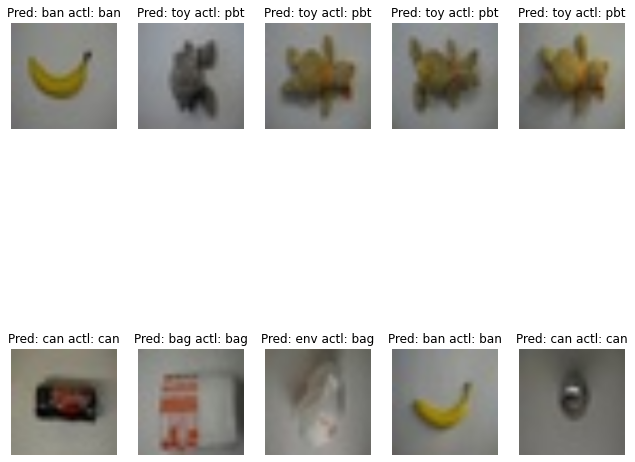

In [ ]:
plt.figure(figsize=(11, 11))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl: '+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

## Распознаем изображение

Загружаем изображение из файла с помощью инструментов Keras

In [ ]:
img = image.load_img('/content/drive/MyDrive/02_2022_images/project_18/toy_2.jpg', target_size=(142, 142), color_mode = "rgb")

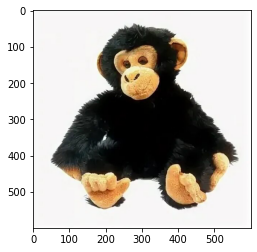

In [ ]:
plt.imshow(img)

Предварительная обработка изображения

In [ ]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 142, 142, 3)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [ ]:
prediction = model.predict(x)

Результаты распознавания

In [ ]:
prediction

array([[0.05858713, 0.2296602 , 0.10035335, 0.11927255, 0.08929359,
        0.40283316]], dtype=float32)

In [ ]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", class_names[prediction])

Номер класса: 5
Название класса: toy
